In [115]:
# Projecte
# Anàlisis i presentació de dades -Inspecions sector alimentari

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

# Carrega de les dades de inspecions del sector alimentari
df = pd.read_csv('Dades/EstablecimientosAlimentarios_2021.csv', header=0, sep=';',encoding='utf-8', dayfirst=True)

############################ Característiques de les dades carregades ###############################

print ("Head:\n" + str(df.head()))     # Els camps de cabçelera
print ("shape:\n" + str(df.shape))
print ("Columnes:\n" + str(df.columns))
print ("Correlacio:\n" + str(df.corr()))
print ("Types:\n" + str(df.dtypes))


############################################### Trantament de les dades ##############################################

# Treiem del conjunt de dades que tenen el programa que es camp opcional
df2 = df.loc[df.loc[:,'PROGRAMA'] != '']
print ("shape:\n" + str(df2.shape))

# Eliminem del conjunt de dades, la variable direccion que no anem a utilitzar
df3 = df2.drop(['DIRECCIÓN'], axis = 1)
print ("shape:\n" + str(df3.shape))

# Creem variable dummy per filtar per el camp Motivo
dummy = pd.get_dummies(df3['MOTIVO'])
df4 = pd.concat([df3, dummy], axis = 1)
df_ok = df4.rename(columns={1:'PROGRAMADA',2:'NO PROGRAMADA'})

# Creem variable numerica per filtar per el dates
df_ok['fecha_Inspeccion_Num'] = df['FECHA DE LA INSPECCIÓN'].astype('datetime64[ns]')

# Creem variable numerica del epigraf i fem substring del valor numeric
df_ok['epigraf_activitat'] = df_ok['EPÍGRAFE DE ACTIVIDAD'].str.slice(0, 6).astype(int)

############################ Característiques de les dades carregades del dataframe filtrat ##########################

# La variable Distrito que serà la nostra variable resposta
X, y = df_ok.loc[:, df_ok.columns != 'DISTRITO'], df_ok.loc[:,'DISTRITO']

print ("Head:\n" + str(df_ok.head()))  # Els camps de cabçelera del nou dataframe
print ("Columnes:\n" + str(df_ok.columns))
print(X.shape, y.shape)

print ("Dades descriptives sensa columna DIRECCIÓN \n")
df_ok.describe()

Head:
  FECHA DE LA INSPECCIÓN DISTRITO              DIRECCIÓN         MOTIVO  \
0             07/05/2021   CENTRO            CL ARENAL 1  NO PROGRAMADA   
1             07/05/2021   CENTRO            CL ARENAL 1  NO PROGRAMADA   
2             14/09/2021   CENTRO            CL ARENAL 1  NO PROGRAMADA   
3             14/09/2021   CENTRO            CL ARENAL 1  NO PROGRAMADA   
4             13/05/2021   CENTRO  CL MESONERO ROMANOS 4  NO PROGRAMADA   

                               EPÍGRAFE DE ACTIVIDAD  \
0  472403 - COM.MENOR PASTELE., CONFIT., REPOST. ...   
1                                 561006 - CAFETERIA   
2  472403 - COM.MENOR PASTELE., CONFIT., REPOST. ...   
3                                 561006 - CAFETERIA   
4                           561004 - BAR RESTAURANTE   

                          PROGRAMA  
0  COMERCIO MINORISTA ALIMENTACIÓN  
1           RESTAURACIÓN COLECTIVA  
2  COMERCIO MINORISTA ALIMENTACIÓN  
3           RESTAURACIÓN COLECTIVA  
4           RESTAURAC

,NO PROGRAMADA,PROGRAMADA,epigraf_activitat
count,12555.000000,12555.000000,12555.000000
mean,0.912624,0.087376,511056.081880
std,0.282396,0.282396,49082.756376
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,472202.000000
50%,1.000000,0.000000,472908.000000
75%,1.000000,0.000000,561005.000000
max,1.000000,1.000000,932002.000000


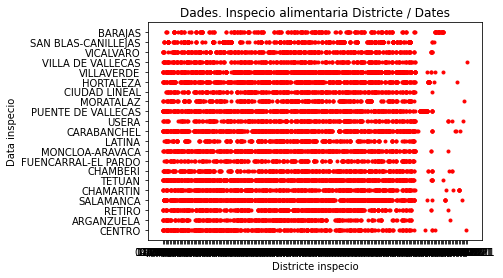

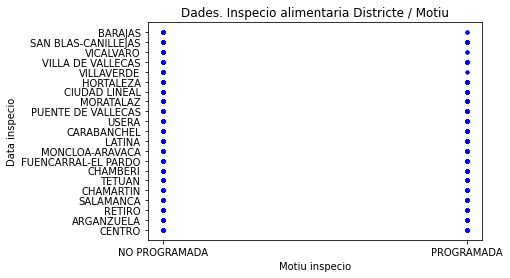

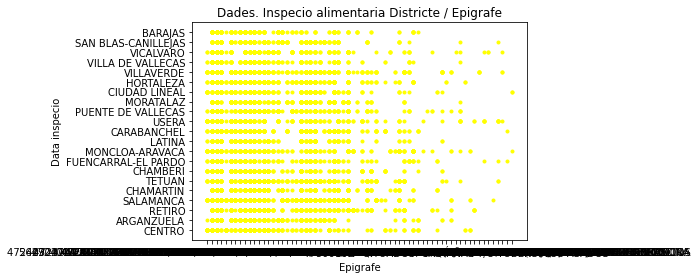

In [116]:
# Explorem les diferents variables del dataframe filtrat

#################################### Gràfic de dades ####################################
plt.scatter(X['FECHA DE LA INSPECCIÓN'],y,marker='.',color = 'Red')
plt.xlabel("Districte inspecio")
plt.ylabel("Data inspecio")
plt.title("Dades. Inspecio alimentaria Districte / Dates")
plt.show()

plt.scatter(X['MOTIVO'],y,marker='.',color = 'Blue')
plt.xlabel("Motiu inspecio")
plt.ylabel("Data inspecio")
plt.title("Dades. Inspecio alimentaria Districte / Motiu")
plt.show()

plt.scatter(X['EPÍGRAFE DE ACTIVIDAD'],y,marker='.',color = 'Yellow')
plt.xlabel("Epigrafe")
plt.ylabel("Data inspecio")
plt.title("Dades. Inspecio alimentaria Districte / Epigrafe")
plt.show()


Resum estadístic per Motivo 
       FECHA DE LA INSPECCIÓN   DISTRITO DIRECCIÓN         MOTIVO  \
count                   12555      12555     12555          12555   
unique                    219         21      4301              2   
top                20/05/2021  SALAMANCA  RD SUR 0  NO PROGRAMADA   
freq                      145       1261        60          11458   

                                    EPÍGRAFE DE ACTIVIDAD  \
count                                               12555   
unique                                                 66   
top     562902 - SERVICIOS COMEDOR EN CENTROS EDUCATIV...   
freq                                                 1215   

                               PROGRAMA  
count                             12555  
unique                                2  
top     COMERCIO MINORISTA ALIMENTACIÓN  
freq                               7036  
Variables MOTIVO per tipus de Programacio 



<AxesSubplot:>

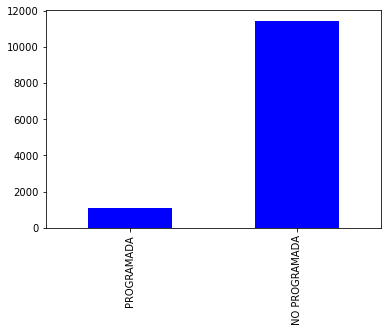

In [118]:
#Filtrat i Resum estadístic per Motivo (Programada , No programada)
print("Resum estadístic per Motivo \n" +  str(df2.describe()))

# Analitzem les variables MOTIVO per tipus de Programacio
print("Variables MOTIVO per tipus de Programacio \n")
counts = df_ok['MOTIVO'].value_counts(sort = False)
counts.index = ('PROGRAMADA','NO PROGRAMADA')
# Visaulitzem grafic amb barras
counts.plot(kind='bar',color = 'Blue')

Resum estadístic per PROGRAMA 
       FECHA DE LA INSPECCIÓN   DISTRITO DIRECCIÓN         MOTIVO  \
count                   12555      12555     12555          12555   
unique                    219         21      4301              2   
top                20/05/2021  SALAMANCA  RD SUR 0  NO PROGRAMADA   
freq                      145       1261        60          11458   

                                    EPÍGRAFE DE ACTIVIDAD  \
count                                               12555   
unique                                                 66   
top     562902 - SERVICIOS COMEDOR EN CENTROS EDUCATIV...   
freq                                                 1215   

                               PROGRAMA  
count                             12555  
unique                                2  
top     COMERCIO MINORISTA ALIMENTACIÓN  
freq                               7036  
Variables PROGRAMA per tipus de programacio 



<AxesSubplot:>

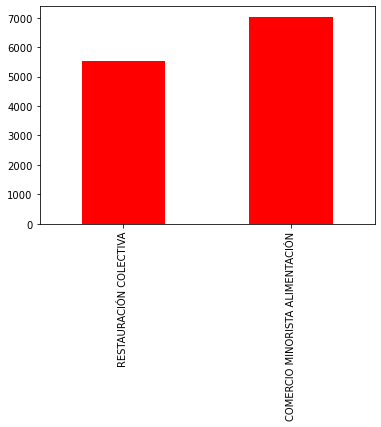

In [119]:
#Filtrat i Resum estadístic per Motivo (RESTAURACIÓN COLECTIVA,COMERCIO MINORISTA ALIMENTACIÓN)
print("Resum estadístic per PROGRAMA \n" +  str(df2.describe()))

# Analitzem les variables MOTIVO per tipus
print("Variables PROGRAMA per tipus de programacio \n")
counts = df_ok['PROGRAMA'].value_counts(sort = False)
counts.index = ('RESTAURACIÓN COLECTIVA','COMERCIO MINORISTA ALIMENTACIÓN')
# Visaulitzem grafic amb barras
counts.plot(kind='bar',color = 'Red')

Resum estadístic per DISTRITO 
       FECHA DE LA INSPECCIÓN   DISTRITO DIRECCIÓN         MOTIVO  \
count                   12555      12555     12555          12555   
unique                    219         21      4301              2   
top                20/05/2021  SALAMANCA  RD SUR 0  NO PROGRAMADA   
freq                      145       1261        60          11458   

                                    EPÍGRAFE DE ACTIVIDAD  \
count                                               12555   
unique                                                 66   
top     562902 - SERVICIOS COMEDOR EN CENTROS EDUCATIV...   
freq                                                 1215   

                               PROGRAMA  
count                             12555  
unique                                2  
top     COMERCIO MINORISTA ALIMENTACIÓN  
freq                               7036  
Variables que són categòriques per mes 



<AxesSubplot:>

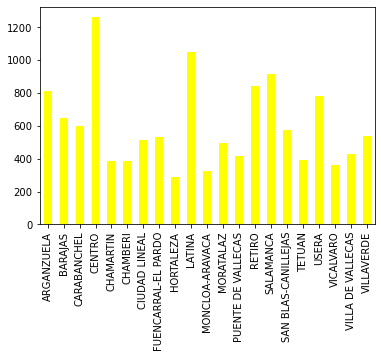

In [120]:
#Filtrat i Resum estadístic per Distrito (ARGANZUELA , BARAJAS, etc...)
print("Resum estadístic per DISTRITO \n" +  str(df2.describe()))

# Analitzem les variables pels diferents Distrites
print("Variables que són categòriques per mes \n")
counts = df_ok['DISTRITO'].value_counts(sort = False)
counts.index = ('ARGANZUELA','BARAJAS', 'CARABANCHEL','CENTRO','CHAMARTIN','CHAMBERI',
                    'CIUDAD LINEAL','FUENCARRAL-EL PARDO','HORTALEZA','LATINA','MONCLOA-ARAVACA','MORATALAZ',
                    'PUENTE DE VALLECAS','RETIRO','SALAMANCA','SAN BLAS-CANILLEJAS','TETUAN','USERA'
                    ,'VICALVARO','VILLA DE VALLECAS','VILLAVERDE')
# Visaulitzem grafic amb barras
counts.plot(kind='bar',color = 'Yellow')

Text(0.5, 0, 'Progamadas vs No Programadas')

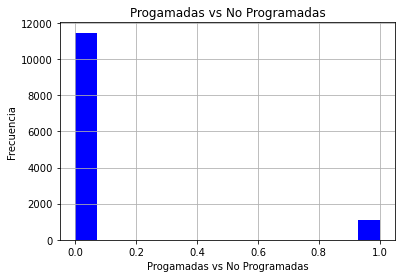

In [121]:
#Filtrat i Resum historiagrama per programacio
df_ok.hist(['PROGRAMADA'], bins=14,color = 'Blue')
plt.title('Progamadas vs No Programadas')
plt.ylabel('Frecuencia')
plt.xlabel('Progamadas vs No Programadas')

Text(0.5, 0, 'Dates')

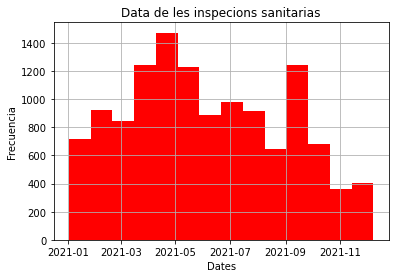

In [122]:
#Filtrat i Resum historiagrama per data
df_ok.hist(['fecha_Inspeccion_Num'], bins=14,color = 'Red')
plt.title('Data de les inspecions sanitarias')
plt.ylabel('Frecuencia')
plt.xlabel('Dates')


Text(0.5, 0, 'Epigraf')

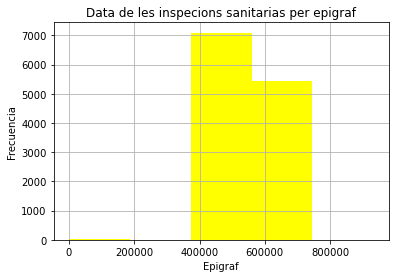

In [123]:
#Filtrat i Resum historiagrama per epigraf numeric
df_ok.hist(['epigraf_activitat'], bins=5,color = 'Yellow')
plt.title('Data de les inspecions sanitarias per epigraf')
plt.ylabel('Frecuencia')
plt.xlabel('Epigraf')

In [125]:
# Entrenament de les dades per epigraf de activitat
X, y = df_ok.loc[:, df_ok.columns != 'epigraf_activitat'], df_ok.loc[:,'epigraf_activitat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Model 1
X_train1 = X_train[['PROGRAMADA']]
lm1 = linear_model.LinearRegression()
model_train1_sk = lm1.fit(X_train1,y_train)
print ("Model 1")
print ("Score:\n" + str(lm1.score(X_train1,y_train)))

# Model 2
X2 = X[['PROGRAMADA', 'NO PROGRAMADA']]
lm = linear_model.LinearRegression()
model2_sk = lm.fit(X2,y)
pred2_sk = model2_sk.predict(X2)

print ("Model 2")
print ("Score:\n" + str(lm.score(X2,y)))
print ("Mean error:\n" + str(mean_squared_error(y, pred2_sk)))



(8411, 8) (4144, 8) (8411,) (4144,)
Model 1
Score:
0.0030522540676820586
Model 2
Score:
0.0039129798139296845
Mean error:
2399499013.134387


In [126]:
# Rendiment models
X_test1 = X_test[['PROGRAMADA']]
y_pred1_sk = model_train1_sk.predict(X_test1)

print ("Rendiment Model 1")
print(' Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1_sk)) 
print(' Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1_sk)) 
print(' Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1_sk)))

# Model 2
X_test2 = X_test[['PROGRAMADA', 'NO PROGRAMADA']]
y_pred2_sk = model_train2_sk.predict(X_test2)
print ("Rendiment Model 2")
print(' Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2_sk)) 
print(' Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2_sk)) 
print(' Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2_sk)))


Rendiment Model 1
 Mean Absolute Error: 44828.35397142632
 Mean Squared Error: 2507209166.880352
 Root Mean Squared Error: 50072.03977151672
Rendiment Model 2
 Mean Absolute Error: 44828.35397142632
 Mean Squared Error: 2507209166.8803515
 Root Mean Squared Error: 50072.03977151671


In [127]:
# Exporta el data set amb les noves columnes a Excel
import pandas as pd

#Generar fitxer Excel
df_ok.to_excel('Dades/EstablecimientosAlimentarios_2021_new.xlsx', index=False)
print("Fitxer generat Dades/EstablecimientosAlimentarios_2021_new.xlsx")

Fitxer generat Dades/EstablecimientosAlimentarios_2021_new.xlsx
